<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [298]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [299]:
print(netflix_df.head())

  show_id  ...             genre
0      s2  ...            Dramas
1      s3  ...     Horror Movies
2      s4  ...            Action
3      s5  ...            Dramas
4      s6  ...  International TV

[5 rows x 11 columns]


In [300]:
print(netflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


In [301]:
print(netflix_df.describe())

       release_year     duration
count   4812.000000  4812.000000
mean    2012.711554    99.566708
std        9.517978    30.889305
min     1942.000000     1.000000
25%     2011.000000    88.000000
50%     2016.000000    99.000000
75%     2018.000000   116.000000
max     2021.000000   253.000000


In [302]:
print(netflix_df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


In [303]:
for col in netflix_df.select_dtypes(include='object'):
    print(col, ":", netflix_df[col].unique())

show_id : ['s2' 's3' 's4' ... 's7782' 's7783' 's7784']
type : ['Movie' 'TV Show']
title : ['7:19' '23:59' '9' ... 'Zoom' 'Zozo' 'Zubaan']
director : ['Jorge Michel Grau' 'Gilbert Chan' 'Shane Acker' ... 'Peter Hewitt'
 'Josef Fares' 'Mozez Singh']
cast : ['Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 'Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane'
 ...
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy']
country : ['Mexico'

In [304]:
no_of_col=len(col)
print(no_of_col)

5


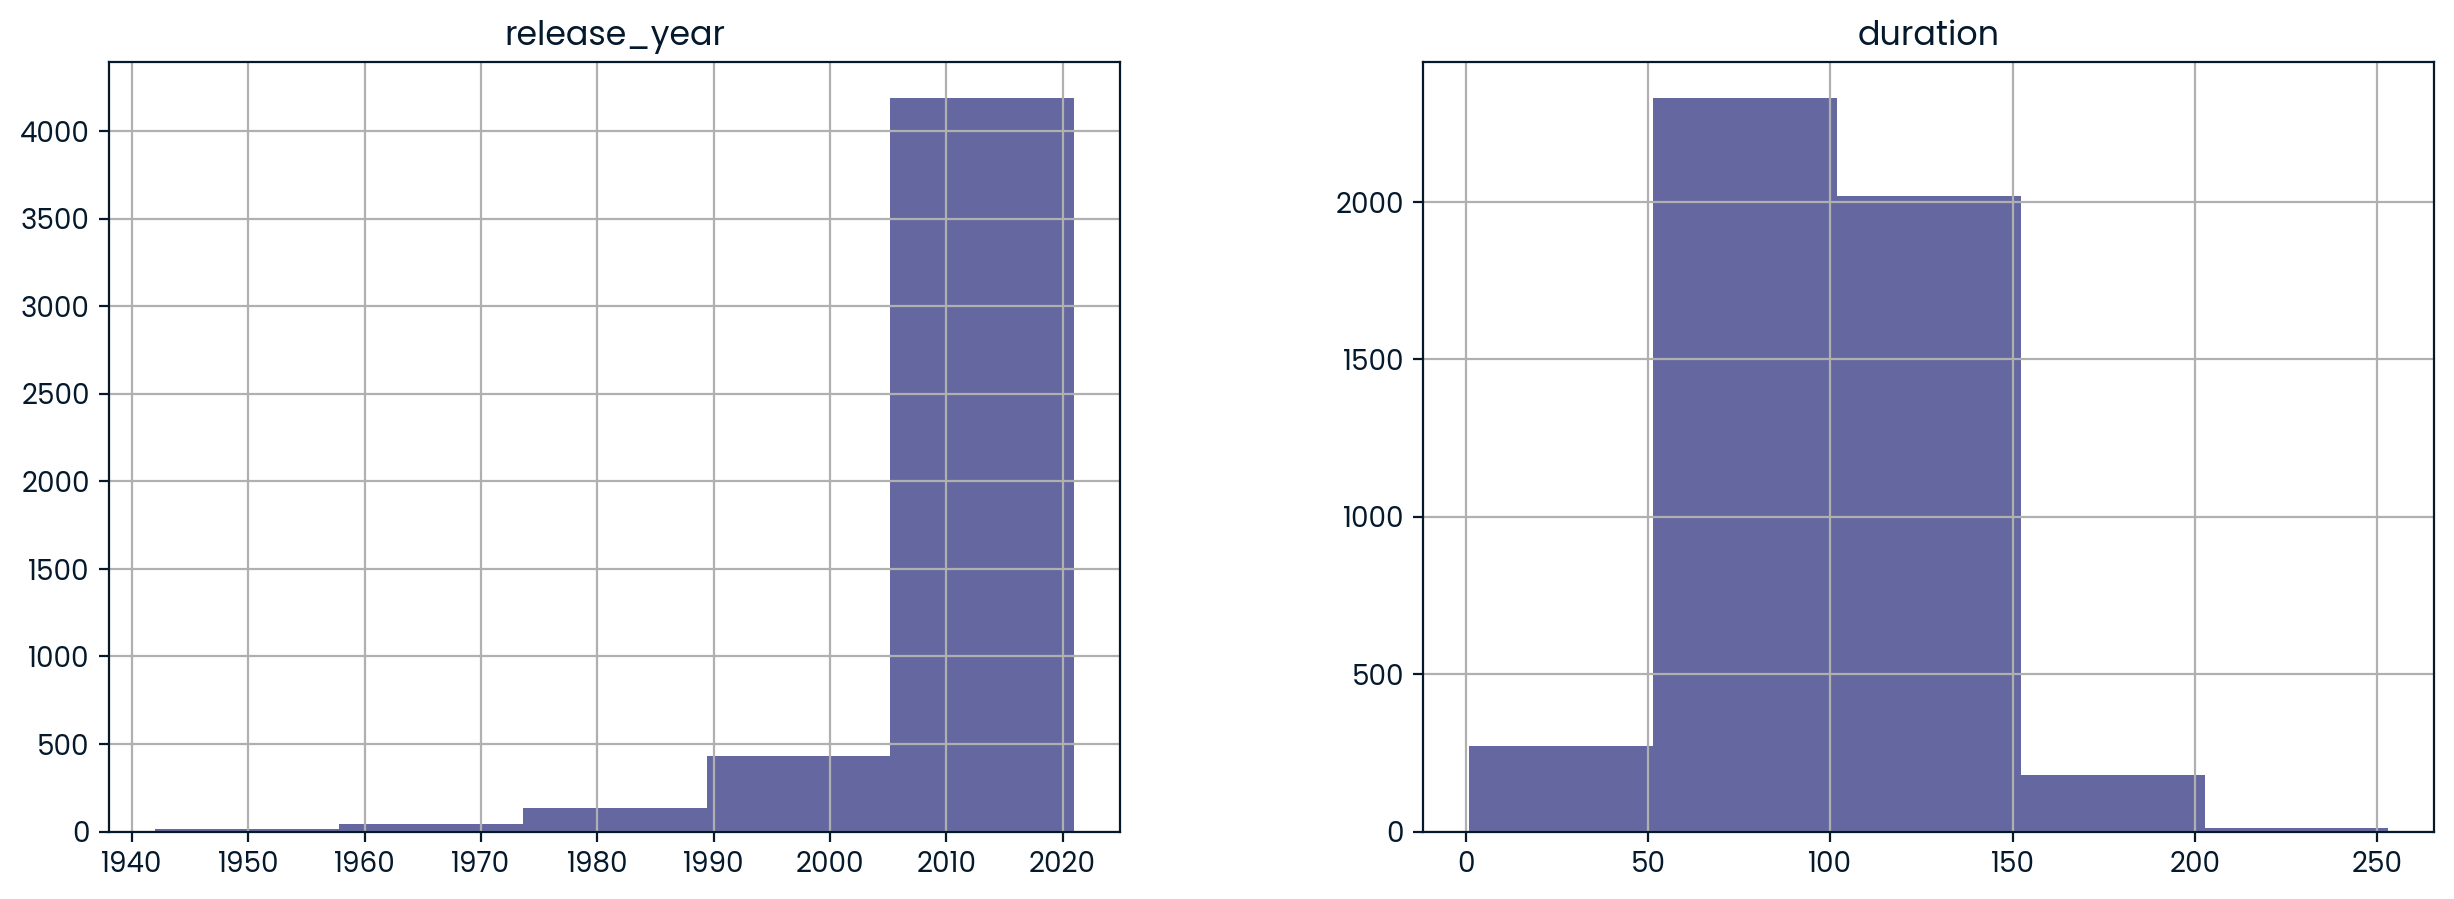

In [305]:
netflix_df.hist(bins=5, figsize=(15,5))
plt.show()

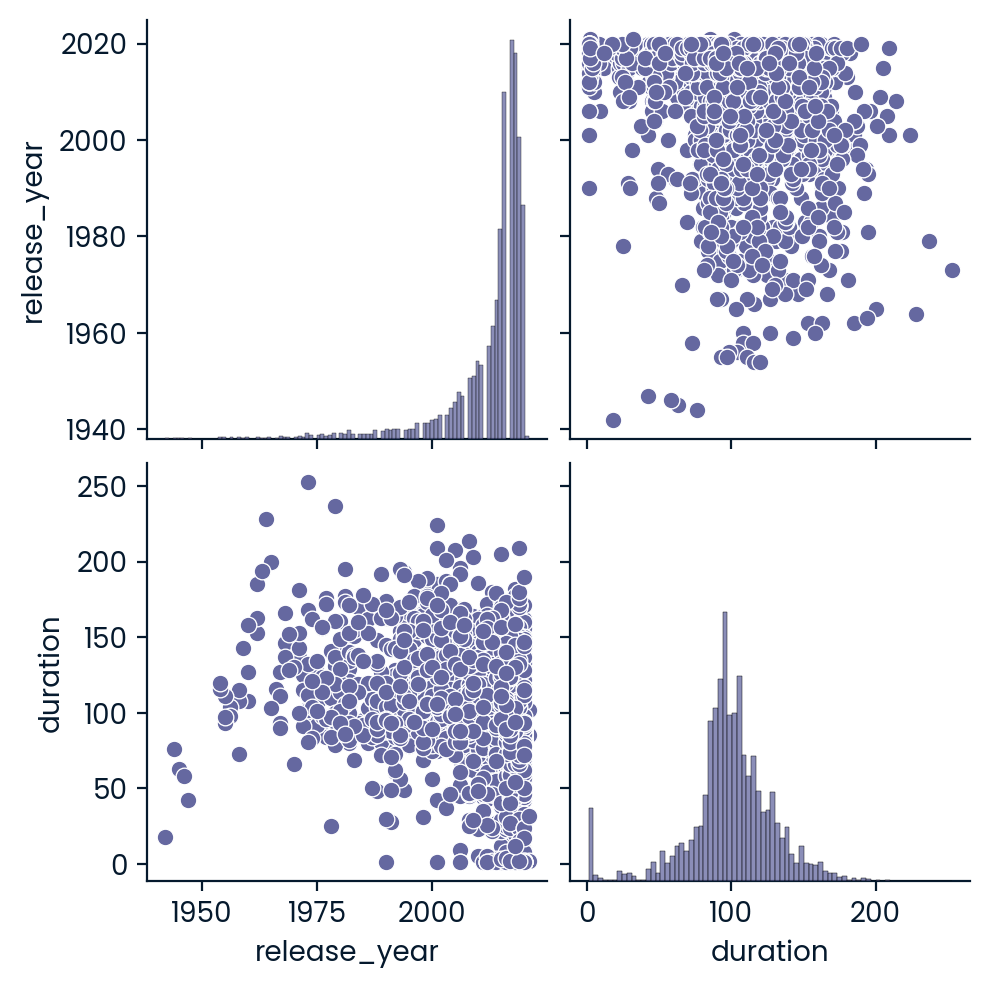

In [306]:
sns.pairplot(netflix_df)
plt.show()

In [307]:
# Create a new column 'movies_in_1990s' in the original DataFrame
netflix_df["movies_in_1990s"] = (netflix_df["release_year"] >=1990) & (netflix_df["release_year"] <= 1999)

# Display the summary information of the DataFrame
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          4812 non-null   object
 1   type             4812 non-null   object
 2   title            4812 non-null   object
 3   director         4812 non-null   object
 4   cast             4812 non-null   object
 5   country          4812 non-null   object
 6   date_added       4812 non-null   object
 7   release_year     4812 non-null   int64 
 8   duration         4812 non-null   int64 
 9   description      4812 non-null   object
 10  genre            4812 non-null   object
 11  movies_in_1990s  4812 non-null   bool  
dtypes: bool(1), int64(2), object(9)
memory usage: 418.4+ KB


In [308]:
print(netflix_df["movies_in_1990s"])

0       False
1       False
2       False
3       False
4       False
        ...  
4807    False
4808    False
4809    False
4810    False
4811    False
Name: movies_in_1990s, Length: 4812, dtype: bool


In [309]:
filtered_1990s_movies=netflix_df[(netflix_df["release_year"] >= 1990) & (netflix_df["release_year"] <= 1999)]
print(filtered_1990s_movies)

     show_id   type  ...           genre movies_in_1990s
6         s8  Movie  ...          Dramas            True
118     s167  Movie  ...          Dramas            True
145     s211  Movie  ...        Comedies            True
167     s239  Movie  ...        Comedies            True
194     s274  Movie  ...          Dramas            True
...      ...    ...  ...             ...             ...
4672   s7536  Movie  ...          Dramas            True
4689   s7571  Movie  ...  Classic Movies            True
4718   s7624  Movie  ...          Action            True
4746   s7682  Movie  ...          Action            True
4756   s7695  Movie  ...          Dramas            True

[184 rows x 12 columns]


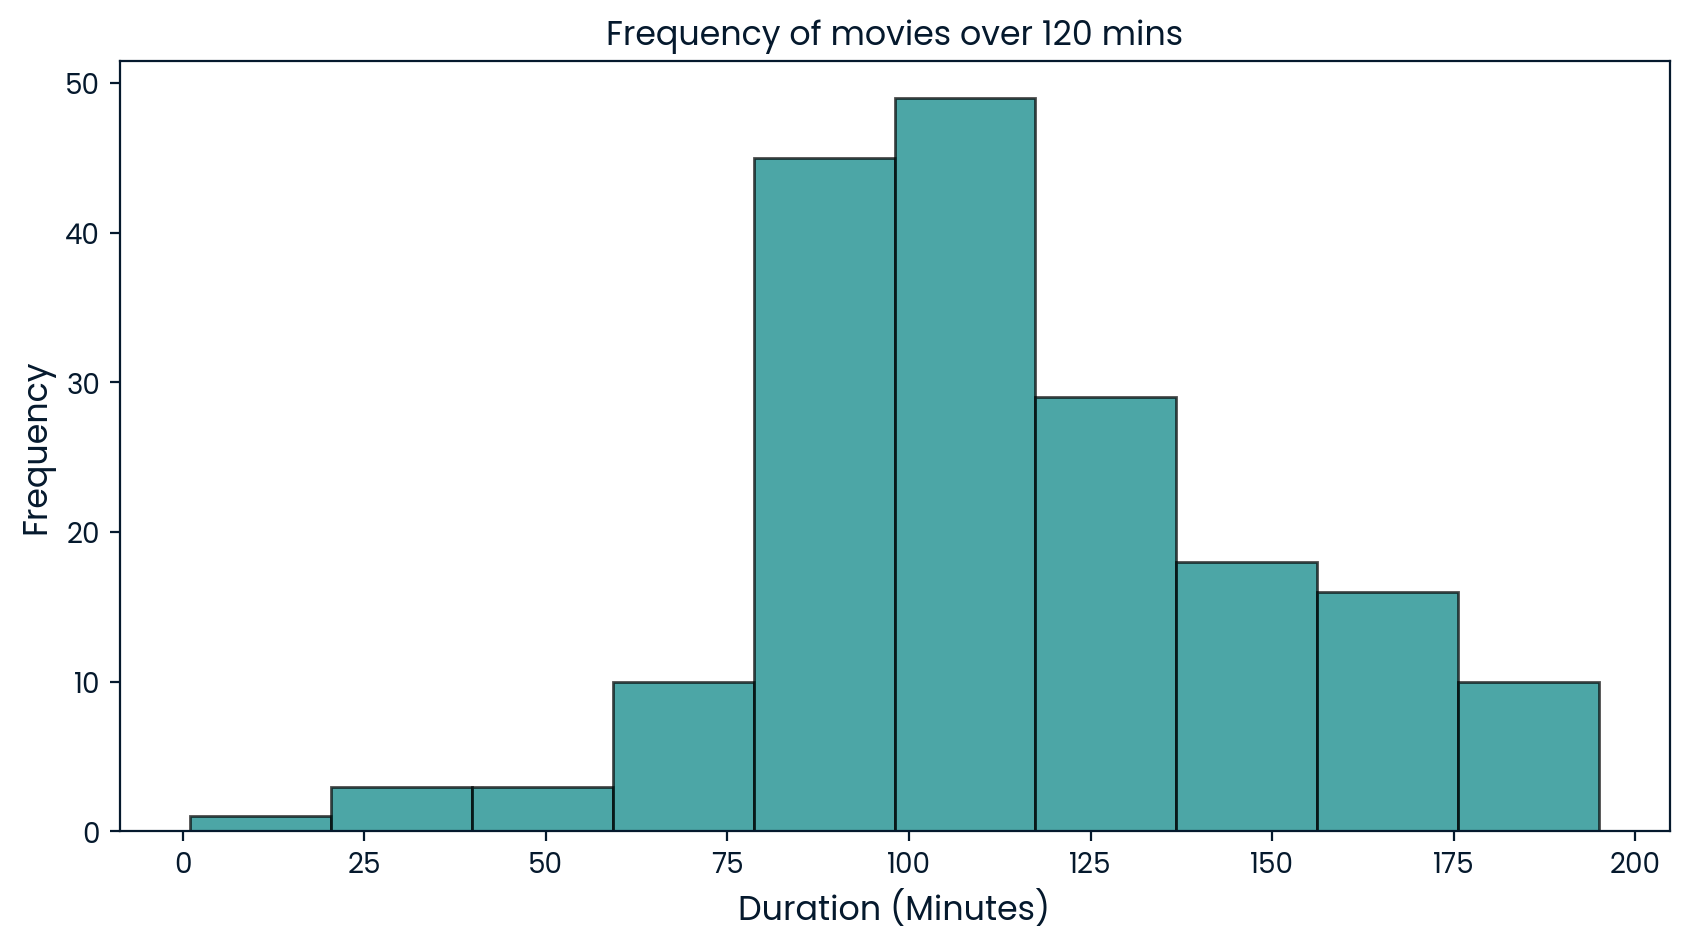

In [310]:
plt.figure(figsize=(10,5))
plt.hist(filtered_1990s_movies['duration'],color='teal', edgecolor='black', alpha=0.7)
plt.title("Frequency of movies over 120 mins")
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

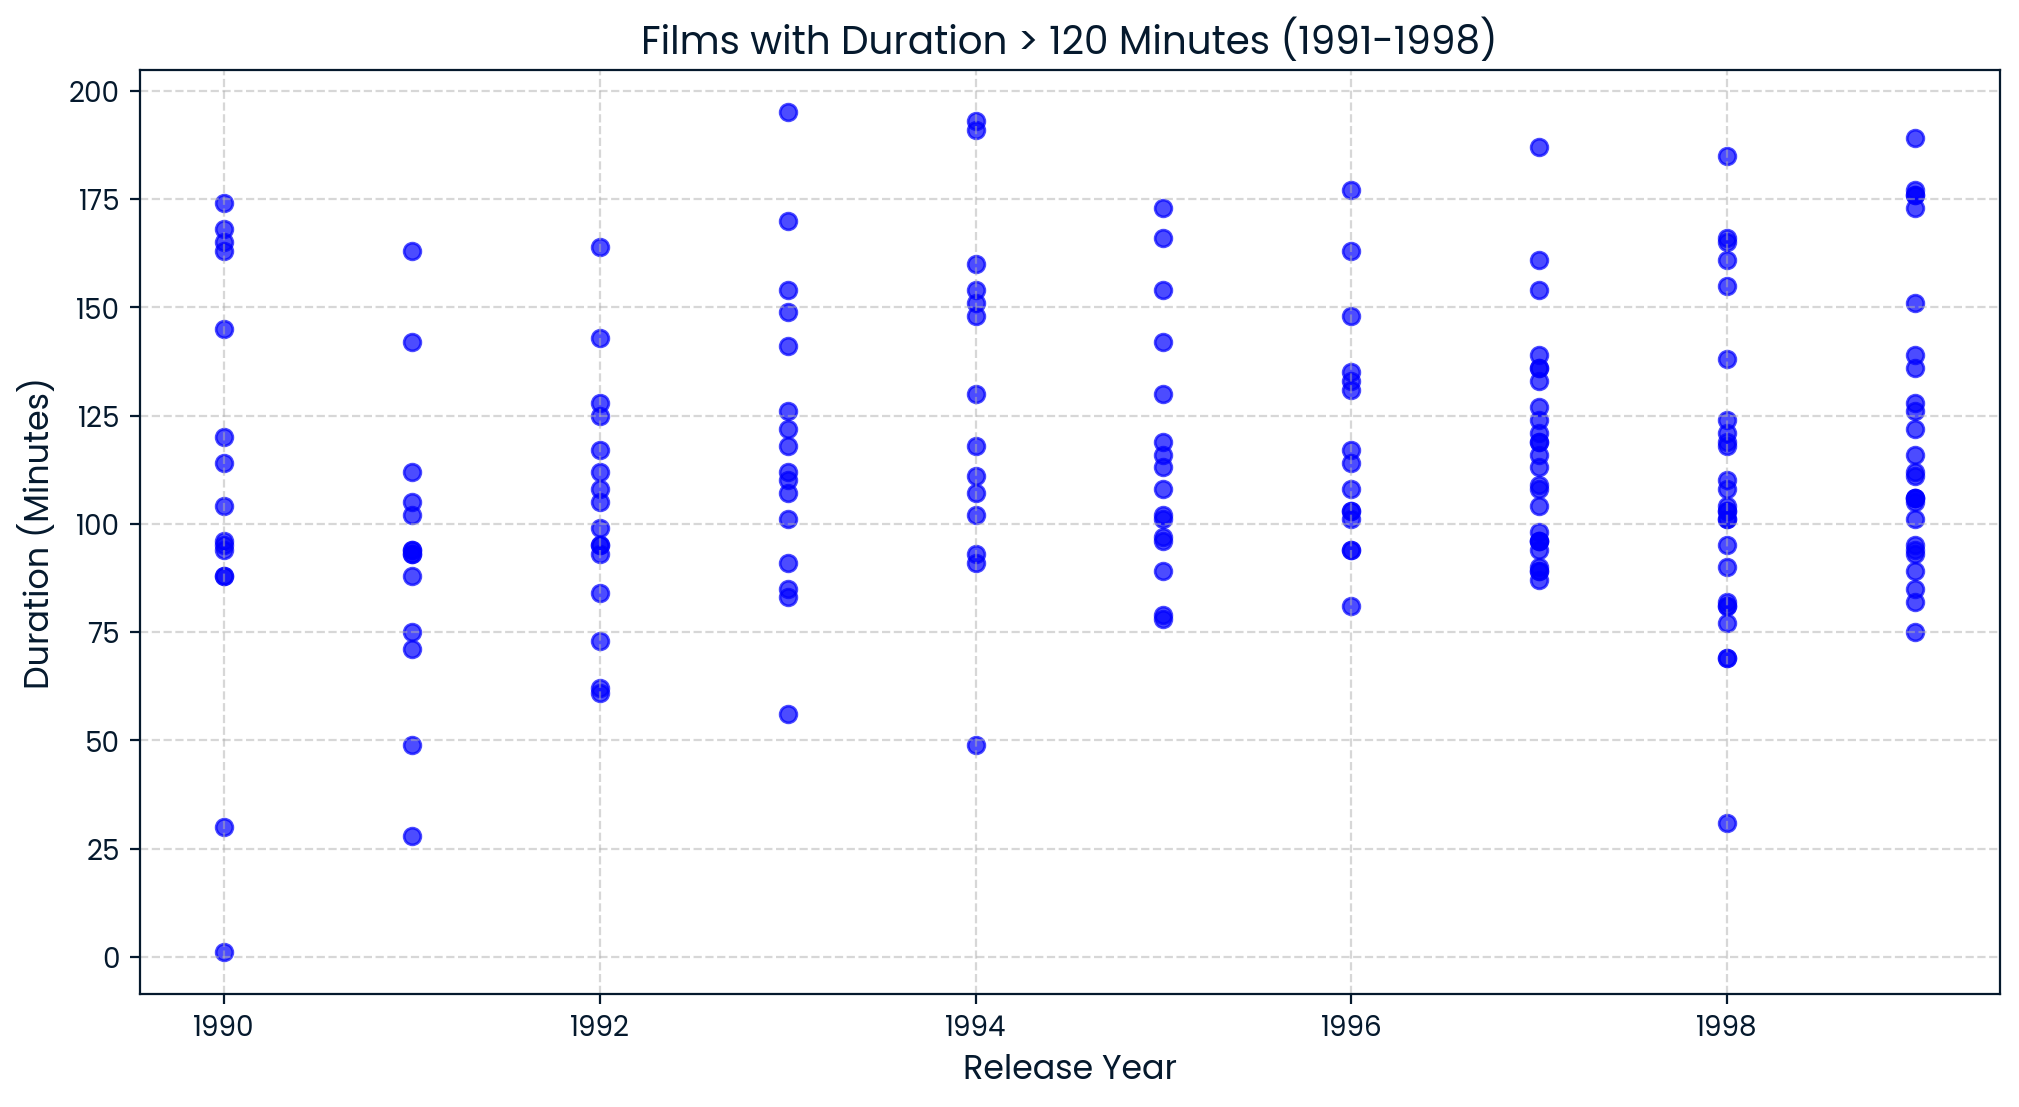

In [311]:
plt.figure(figsize=(12, 6))
plt.scatter(filtered_1990s_movies['release_year'], filtered_1990s_movies['duration'], color='blue', alpha=0.7)
plt.title('Films with Duration > 120 Minutes (1991-1998)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [312]:
duration=filtered_1990s_movies["duration"].mode()[0]
print(duration)

94


In [313]:
short_movie= filtered_1990s_movies[(filtered_1990s_movies["duration"]<90) & (filtered_1990s_movies['genre']=="Action") & (filtered_1990s_movies["type"]=="Movie")]
print(short_movie)

     show_id   type  ...   genre movies_in_1990s
1288   s2039  Movie  ...  Action            True
1698   s2708  Movie  ...  Action            True
2328   s3718  Movie  ...  Action            True
2993   s4787  Movie  ...  Action            True
3297   s5299  Movie  ...  Action            True
3806   s6114  Movie  ...  Action            True
3943   s6330  Movie  ...  Action            True

[7 rows x 12 columns]


In [314]:
short_movie_count=0
for lab, gen in short_movie.iterrows():
    short_movie_count+=1
    print(str(lab) + ":" + str(gen['duration']))
print()    
print("Number of short movies: ")
print(short_movie_count)

1288:69
1698:89
2328:88
2993:84
3297:89
3806:83
3943:87

Number of short movies: 
7
